# Homework 4

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
def Vander(x,K):
    phi=np.zeros((x.shape[0],K))
    for i in range(K):
        phi[:,i]=x**i
    return phi

def average_abs_error(theta,Testdata):
    Xtest=Testdata[0]
    Ytest=Testdata[1]
    return np.linalg.norm(np.vander(Xtest,len(theta))@theta-Ytest,2)*(1/len(X))

def split_data(X,Y,NTrain):
    index=np.linspace(0,len(Y)-1,len(Y),dtype=int)
    np.random.shuffle(index)
    X,Y =X[index],Y[index]
    Xtrain,Ytrain=X[:NTrain], Y[:NTrain]
    Xtest,Ytest=X[NTrain:],Y[NTrain:]
    return Xtrain,Ytrain ,Xtest,Ytest

def ftheta_map(data,k,lamda):
    X,Y=data[0],data[1]
    Phi=np.vander(X,k)
    theta_map_k=np.linalg.solve(Phi.T@Phi + lamda*np.identity(k), Phi.T@Y)
    return theta_map_k


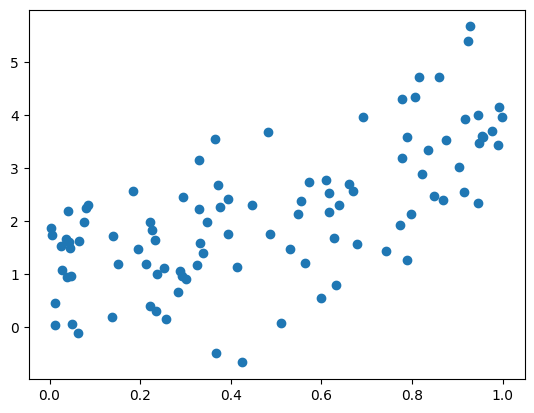

In [91]:
N=100
K=4
theta=np.ones((K,))
a,b=0,1
X=np.random.uniform(low=a,high=b,size=N)
variance=1
Phi=np.vander(X,K)
Y=Phi@theta+np.random.normal(0,variance,size=N)
plt.scatter(X,Y);


### Part 3

In [ ]:
K_vec=[3,4,5,10,20,30]
for K in K_vec:
    print("K= ",K)
    plt.scatter(X,Y);#plot the data
    Xtrain,Ytrain ,Xtest,Ytest=split_data(X,Y,int(N-N/3))
    Phi=np.vander(Xtrain,K)
    theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
    Y_approx_train=Phi@theta_MLE
    plt.scatter(Xtrain,Y_approx_train, c="red");
    Phi=np.vander(Xtest,K)#plot the test data
    Y_approx_test=Phi@theta_MLE
    plt.scatter(Xtest,Y_approx_test,c="green")  
    plt.show()

In [83]:
Xtrain,Ytrain ,Xtest,Ytest=split_data(X,Y,int(N-N/3))

In [97]:
K_vec=[1,2,3,4,5,10,20,30,40,50]
lmda=0.1
for k in K_vec:
    Phi=np.vander(Xtrain,k)
    theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
    
    Xtest=np.random.uniform(low=a,high=b,size=len(Xtest))
    variance=1
    Phi=np.vander(Xtest,k)
    theta=np.ones((k,))
    Ytest=Phi@theta+np.random.normal(0,variance,size=len(Xtest))
    Y_approx_test=Phi@theta_MLE
    
    theta_map=ftheta_map((Xtrain,Ytrain),k,lmda)
    Y_approx_map=Phi@theta_map
    
    print("K=",k)
    #plt.scatter(Xtest,Ytest)
    #plt.scatter(Xtest,Y_approx_test,c="red")
    #plt.scatter(Xtest,Y_approx_map,c="green")
    #plt.show()
    print(f"The TRAINING average absolute error for K={k} is =",average_abs_error(theta_MLE,(Xtrain,Ytrain)))
    print(f"The TEST average absolute error for K={k} is =", average_abs_error(theta_MLE,(Xtest,Ytest)))
    print(f"The TEST absolute error for theta male for K={k} and λ={lmda} is =",
        average_abs_error(theta_map,(Xtest,Ytest)))
    
 

K= 1
The TRAINING average absolute error for K=1 is = 0.11616211164486437
The TEST average absolute error for K=1 is = 0.08983741318768239
The TEST absolute error for theta male for K=1 and λ=0.1 is = 0.08968768032443775
K= 2
The TRAINING average absolute error for K=2 is = 0.08430018606758853
The TEST average absolute error for K=2 is = 0.07438127588940073
The TEST absolute error for theta male for K=2 and λ=0.1 is = 0.0739513407501494
K= 3
The TRAINING average absolute error for K=3 is = 0.08393704802487138
The TEST average absolute error for K=3 is = 0.06975551941729788
The TEST absolute error for theta male for K=3 and λ=0.1 is = 0.06963749342600353
K= 4
The TRAINING average absolute error for K=4 is = 0.0829160374605768
The TEST average absolute error for K=4 is = 0.05521488293069817
The TEST absolute error for theta male for K=4 and λ=0.1 is = 0.054568006736954056
K= 5
The TRAINING average absolute error for K=5 is = 0.08272385197387024
The TEST average absolute error for K=5 is 